In [2]:
import pandas as pd
import timeit
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset=pd.read_csv("C:\\Users\\DELL\\Desktop\\diabetes.csv")
dataset.head(10) 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
#seperating independent and dependent variables
x = dataset.drop(['Outcome'], axis=1)
y = dataset['Outcome']
x.shape, y.shape

((768, 8), (768,))

In [5]:
#split the dataset in training and testing phase
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [34]:
#training the algorithm
svcclassifier=SVC(kernel='linear')
start=timeit.default_timer()
svcclassifier.fit(x_train,y_train)
stop=timeit.default_timer()
print('time:',stop-start)
#print(start)
#print(stop)

time: 8.93854250000004


In [35]:
#predict
start=timeit.default_timer()
y_pred=svcclassifier.predict(x_test)
stop=timeit.default_timer()
print('time:',stop-start)
y_pred

time: 0.005936999999903492


array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [36]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))


Accuracy: 0.8116883116883117


In [10]:
def error(kernel):
    test_error=[]
    for i in range(len(kernel)):
        classifier=SVC(kernel=kernel[i])
        classifier.fit(x_train,y_train)
        tmp=classifier.predict(x_test)
        tmp=metrics.accuracy_score(y_test,tmp)
        error=1-tmp
        test_error.append(error)
    return test_error  

In [11]:
#kernel list
kernel=['poly','linear','rbf']

In [12]:
# calling above defined function
test = error(kernel)


Text(0.5, 1.0, 'error Curve for test')

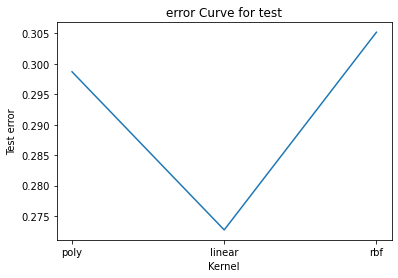

In [51]:
# plotting the Curves
plt.plot(kernel, test)
plt.xlabel('Kernel')
plt.ylabel('Test error')
plt.title('error Curve for test')